# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


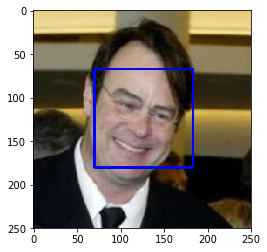

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

The percentage of human faces detected in the first 100 human_file_short are: 98%
The percentage of human faces detected in the first 100 dog_files_short are: 17%

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

detected_human_face = 0
detected_dog_face = 0

for img in human_files_short:
    if face_detector(img) == True:
        detected_human_face += 1
        
for img in dog_files_short:
    if face_detector(img) == True:
        detected_dog_face += 1
        
print("The percentage of human faces detected in the first 100 human_file_short are: {0}%".format(detected_human_face))
print("The percentage of human faces detected in the first 100 dog_files_short are: {0}%".format(detected_dog_face))

The percentage of human faces detected in the first 100 human_file_short are: 98%
The percentage of human faces detected in the first 100 dog_files_short are: 17%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
 def face_deter_ext(img_path):
    '''
    Using a CascadeClassifier that works with thw haarcascade-file 'haarcascade_frontalface_alt_tree.xml' 
    to check if a face of a person is present in an image.
    
    Args:
        img_path: path to an image
    Returns: 
        Returns True if a face is present on an image and False if it does not
    '''    

  # extract pre-trained face detector from opencv
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt_tree.xml')

    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (Optional)
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

detected_human_face = 0
detected_dog_face = 0

for img in human_files_short:
    if face_detector(img) == True:
        detected_human_face += 1
        
for img in dog_files_short:
    if face_detector(img) == True:
        detected_dog_face += 1
        
print("The percentage of human faces detected in the first 100 human_file_short are: {0}%".format(detected_human_face))
print("The percentage of human faces detected in the first 100 dog_files_short are: {0}%".format(detected_dog_face))


The percentage of human faces detected in the first 100 human_file_short are: 98%
The percentage of human faces detected in the first 100 dog_files_short are: 17%


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# Define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# Check if CUDA is available
use_cuda = torch.cuda.is_available()

# Move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:07<00:00, 73447401.43it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    image = Image.open(img_path).convert('RGB')
    
    # Define normalization of the image
    normalization = transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                         std=(0.229, 0.224, 0.225))
    
    # Define transformations of image 
    preprocess = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(),
                                     normalization])
    
    # Pre-process image
    input_tensor = preprocess(image)
    
    # Create a one dimensional tensor image
    input_batch = input_tensor.unsqueeze(0)
    
    # Move model to GPU if CUDA is available
    if use_cuda:
        input_batch = input_batch.cuda()
    
    # Get the prediction of the model
    output = VGG16(input_batch)  
    print(output)
    print(output[0])
    
    # Returns the maximum value of all elements in the input tensor.
    prediction_idx = torch.max(output,1)[1].item()
    
    # Return the *index* of the predicted class/category for that image
    return prediction_idx
    

In [8]:
VGG16_predict(dog_files_short[0])

tensor([[  0.3471,  -2.6420,  -2.1986,  -2.1897,  -2.2541,  -1.2398,
          -0.5294,   1.3827,  -1.1637,  -3.2558,  -4.8133,  -5.1078,
          -5.3423,  -5.5103,  -5.8487,  -4.3456,  -3.8768,  -5.0234,
          -3.4666,  -5.3393,  -7.0076,  -2.9016,  -4.3354,  -4.9677,
          -3.5416,  -1.5345,  -1.3645,  -2.4390,  -1.5855,  -1.1545,
          -1.2648,  -2.4524,  -2.4534,  -0.7105,  -1.6807,   1.0778,
          -0.2319,   1.4452,  -2.2516,  -1.0147,  -3.6923,  -3.0928,
          -6.6514,  -5.9324,  -2.3259,  -1.3040,  -1.7919,  -2.8627,
          -2.0602,  -2.8441,  -5.0759,   3.3688,   0.7305,  -0.0600,
          -1.0808,  -0.2903,  -2.8948,  -0.9621,  -2.8330,  -0.5450,
           0.5626,   1.1426,   0.4546,  -1.9728,  -0.0274,  -0.9662,
           0.1811,  -2.3953,  -1.3412,  -0.3681,   0.1753,  -1.3941,
          -2.5089,  -3.5042,  -3.0531,  -1.4585,  -3.2227,  -2.0751,
          -2.2862,   1.2191,  -3.5156,  -5.1951,  -2.3338,  -4.5257,
          -4.9051,  -3.2251,  -1.0

243

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    '''
    This function uses a pretrained VGG16-model to make a prediction if a dog in an image is detected or not
    
    Args:
        img_path: path to an image
        
    Returns:
        Returns "True" if a dog is detected in the image stored at the image path
   '''     
        
    ## TODO: Complete the function.
    
    ## First index dictionary keys of dogs
    first_index = 151
    
    ## Last index dictionary keys of dogs
    last_index = 268
    
    predicted_index = VGG16_predict(img_path)
    
    return True if predicted_index>=151 and predicted_index<=268 else False

In [10]:
print(dog_detector(dog_files_short[0]))
print(dog_detector(human_files_short[0]))

tensor([[  0.0485,  -2.8731,  -1.7089,  -3.3020,  -3.5165,  -1.0165,
          -0.8284,   1.7116,  -0.5017,   0.2973,  -2.6621,  -4.5097,
          -5.3683,  -3.2662,  -3.6680,  -3.7544,  -4.1327,  -2.8300,
          -1.2799,  -3.5982,  -5.7513,  -1.5933,  -3.6850,  -2.5639,
          -2.5618,  -0.6488,  -1.9728,  -2.4496,  -0.7624,  -2.7192,
          -1.9717,  -3.0869,  -1.9784,  -0.4505,  -1.8271,   1.5846,
           0.5743,   0.7499,  -4.1373,  -3.0762,  -4.3115,  -3.7452,
          -7.6113,  -3.8893,  -3.2930,  -0.9123,  -3.1405,  -4.3648,
          -3.6852,  -2.2925,  -1.6219,  -0.0554,   0.6161,  -1.1444,
          -1.2132,  -2.2256,  -1.8847,  -0.6723,  -4.9622,  -1.8809,
          -0.8790,  -2.0414,  -1.2893,  -0.9566,  -1.7008,  -1.5689,
          -2.9613,  -3.1238,  -3.5567,  -2.9119,  -1.0883,  -2.2012,
          -0.4535,  -2.0559,  -2.1606,   0.7923,  -1.9239,  -0.9270,
           1.8337,  -0.4864,  -3.2585,  -4.1523,  -0.8696,  -3.6008,
          -2.0156,  -2.1458,  -0.8

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:_  

The percentage of dogs detected in human_file_short are: 0%
The percentage of dogs detected in dog_files_short are: 100%

In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

detected_human = 0
detected_dog = 0

for img in human_files_short:
    if dog_detector(img) == True:
        detected_human += 1
        
for img in dog_files_short:
    if dog_detector(img) == True:
        detected_dog += 1
        
print("The percentage of dogs detected in human_file_short are: {0}%".format(detected_human))
print("The percentage of dogs detected in dog_files_short are: {0}%".format(detected_dog))



tensor([[  2.4191,  -0.5783,  -0.5550,  -2.5938,  -1.2418,  -0.1740,
          -4.0257,  -1.4369,  -3.5917,  -5.6384,  -1.0659,  -3.1215,
          -4.1938,  -3.7048,  -4.1083,  -3.4183,  -2.4799,  -3.6489,
          -2.8132,  -4.3136,  -3.5328,  -2.2775,  -1.8976,  -3.6818,
          -4.5738,  -2.6111,  -2.4605,  -2.1559,  -2.4115,  -0.3158,
          -2.0497,  -1.2603,  -1.4297,  -0.3753,  -1.6749,  -2.4220,
          -0.7579,  -2.0315,  -0.9739,  -2.2555,  -2.5522,  -2.8932,
          -3.3021,  -0.5172,  -2.0901,  -0.1716,  -3.2685,  -0.6551,
          -3.0160,  -3.9815,  -2.0189,  -0.6057,  -1.1495,  -1.2600,
          -0.4010,  -2.0953,  -0.6618,  -3.1396,  -3.6227,   0.6221,
           0.4321,   0.9415,   1.1816,  -0.2888,   0.5784,  -1.7189,
          -0.5556,  -0.4044,  -0.4830,  -3.5793,  -4.1612,  -1.0105,
          -3.3385,  -1.2592,  -3.4103,  -4.5357,  -1.0251,  -4.3872,
          -0.8660,  -2.3651,  -2.9792,  -3.5219,  -3.4735,  -2.8533,
          -4.0449,  -3.2613,  -2.4

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [12]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
#import torch
#from PIL import ImageFile
#ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


# Location of train, validation, and test directories
data_dir = '/data/dog_images' 
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

# Define transformations

normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406],                       
                                     std=[0.229, 0.224, 0.225])

train_dataset = transforms.Compose([transforms.RandomResizedCrop(224),                                                                            
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10), 
                                      transforms.ToTensor(),
                                      normalization])


valid_dataset = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      normalization])

test_dataset =  transforms.Compose([transforms.Resize(size=(224,224)),
                                      transforms.ToTensor(), 
                                      normalization])
                  
# Define Data loaders
# Set batch size and number of workers

batch_size = 20
num_workers = 0

# Load image_datasets into image folder
train_data = datasets.ImageFolder(train_dir, transform=train_dataset)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_dataset)
test_data = datasets.ImageFolder(test_dir, transform=test_dataset)

# Set data loaders for training, validation and testing
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)


# Add data loaders to dictionary
loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}


In [13]:
train_data, valid_data, test_data

(Dataset ImageFolder
     Number of datapoints: 6680
     Root Location: /data/dog_images/train/
     Transforms (if any): Compose(
                              RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                              RandomHorizontalFlip(p=0.5)
                              RandomRotation(degrees=(-10, 10), resample=False, expand=False)
                              ToTensor()
                              Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                          )
     Target Transforms (if any): None, Dataset ImageFolder
     Number of datapoints: 835
     Root Location: /data/dog_images/valid/
     Transforms (if any): Compose(
                              Resize(size=256, interpolation=PIL.Image.BILINEAR)
                              CenterCrop(size=(224, 224))
                              ToTensor()
                              Normalize(mean=[0.485, 0.456, 0.4

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:  

I have applied normalization to all three datasets.  Then I used RandomResizedCrop, RandomHorizontalFlip, RandomRotation to augment the images in the train_data to prevent overfitting. Data augmentation improves generalization when training the model.  These transforms were used to reduce and enhance the performance of the images in the model. The training data images were resized to (224, 224).  The images in the valid_data sets were resized to 256 and centercrop to 224 X 224. These images were not augmented in the valid_data because it is only used for validation check.  I also did not augment the images in the test data set since it is just used for testing. The images in the test data set were also resized to (224, 224) because I noticed that most pretrained models take in that size. This was the only transform tool used in the test data set. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        
        # Pooling
        self.pool = nn.MaxPool2d(2, 2)
        
        # Fully-connected Layers
        self.fc1 = nn.Linear(128 * 28 *28, 512)  #28*28 from image dimension
        self.fc2 = nn.Linear(512, 133) 
    
        # Drop-out
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        # Add sequence of convolutional layer and max pooling layer
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        # Flatten
        x = x.view(-1, 128*28*28)    # Rotate with size 784*128
        
        # Add first hidden layer with relu activation function
        x = F.relu(self.fc1(x))
        
        # Add dropout layer
        x = self.dropout(x)
        
        # Add second hidden layer with relu activation function
        x = self.fc2(x)
        return x
   
#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
#print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [15]:
model_scratch

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I wanted a simple model that would give me 10% test accuracy therefore I constructed the model with three CNN layers. Each of the CNN layers has a kernel size of 3, specifying the height and weight of the convolutional kernel. The stride was set to 1. Padding is set to 0 to add borders.  There is a maxpooling with a 2x2 kernel and a stride of 2.  This will downsize the image input size by 2.  Flatten Layer is used to convert the pooled feature maps to a single vector. There are two fully-connected layers.  One is placed before dropout. The dropout of 0.25 is used to avoid overfitting. The final fully-connected layer produces the final output_size of 133 which predicts classes of breeds.
 

Step 1: Convolutional Layer with 3 input dimensions and 32 ouput dimensions and kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)

Relu Activation function

Pooling layer: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

Relu Activation Function

Step 2: Convolutional Layer with 32 input dimensions and 64 ouput dimensions and kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)

Relu Activation Function

Pooling Layer: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

Step 3: Convolutional Layer with 64 input dimensions and 128 ouput dimensions and kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

Pooling Layer: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

Flatten Layer to convert the pooled feature maps to a single vector

Fully Connected Linear Layer: Linear(in_features=100352, out_features=512, bias=True)

Dropout with a probabilty of 0.25

Fully Connected Linear Layer: Linear(in_features=512, out_features=133, bias=True)

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [16]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.02)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
from PIL import ImageFile
ImageFile.LOAD_Truncated_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    '''
    This function is responsible for training the model
    
    Args:
        n-epochs:    Numbers of epochs to train
        loaders:     Dictionary of loaders
        optimizer:   Model for training
        criterion:   Loss function
        use-cuda:    True if GPU is used, False if CPU is used
        save_path:   Saving path to save the model
        
    Returns:
        returns trained model

    '''
    
    # Initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # Initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # Train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # Move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## Find the loss and update the model parameters accordingly
            ## Record the average training loss, using something like
            ## Train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            # Initialize weights to zero
            optimizer.zero_grad()
            
            output = model(data)
            
            # Calculate loss
            train_losses = []
            
            loss = criterion(output, target)
            
            # Back prop
            loss.backward()
            
            # Grad
            optimizer.step()
            
            ## Record the average training loss,
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
            
        ######################    
        # Validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # Move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## Update the average validation loss
            output = model(data)
            
            loss = criterion(output, target)         
            
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
                 
        # Print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    # Return trained model
    return model

In [18]:
# Train the model 100
n_epochs = 25
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'saved_models/model_scratch.pt')


Epoch 1, Batch 1 loss: 4.885921
Epoch 1, Batch 101 loss: 4.884369
Epoch 1, Batch 201 loss: 4.878211
Epoch 1, Batch 301 loss: 4.868356
Epoch: 1 	Training Loss: 4.866424 	Validation Loss: 4.806138
Validation loss decreased (inf --> 4.806138).  Saving model ...
Epoch 2, Batch 1 loss: 4.826855
Epoch 2, Batch 101 loss: 4.786399
Epoch 2, Batch 201 loss: 4.769129
Epoch 2, Batch 301 loss: 4.744250
Epoch: 2 	Training Loss: 4.737433 	Validation Loss: 4.568280
Validation loss decreased (4.806138 --> 4.568280).  Saving model ...
Epoch 3, Batch 1 loss: 4.667395
Epoch 3, Batch 101 loss: 4.661074
Epoch 3, Batch 201 loss: 4.643412
Epoch 3, Batch 301 loss: 4.629859
Epoch: 3 	Training Loss: 4.628398 	Validation Loss: 4.475906
Validation loss decreased (4.568280 --> 4.475906).  Saving model ...
Epoch 4, Batch 1 loss: 4.391844
Epoch 4, Batch 101 loss: 4.555887
Epoch 4, Batch 201 loss: 4.556752
Epoch 4, Batch 301 loss: 4.554324
Epoch: 4 	Training Loss: 4.555042 	Validation Loss: 4.377952
Validation loss de

In [21]:
# Load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('saved_models/model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [19]:
def test(loaders, model, criterion, use_cuda):
    '''
    This is a test function to print the overall test accuracy and the overall test loss
    
    Args:
        loaders:    Dictionary of dataloaders
        model:      Model for prediction
        criterion:  Loss Function
        use_cuda:   True if GPU is used, False if CPU is used
    Returns:
        Nothing
    '''    
    
    # Monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # Move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the loss
        loss = criterion(output, target)
        # Update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # Convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # Compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [20]:
# Call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.838664


Test Accuracy: 12% (104/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [22]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [23]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# load the pretrained model from PyTorch
model_transfer = models.resnet101(pretrained=True)

# Freeze feature parameters
for param in model_transfer.parameters():
    param.requires_grad = False
    
# Define new classifier
model_transfer.fc = nn.Linear(2048, 133, bias=True)

# Extract fully-connnected layers
fc_parameters = model_transfer.fc.parameters()
for param in fc_parameters:
    param.requires_grad = True

# Move the image to gpu if available    
if use_cuda:
    model_transfer = model_transfer.cuda()
    
print(model_transfer)    

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.torch/models/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:03<00:00, 51880118.76it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:___


Steps took to get to your final CNN architecture:

A. Imported the pretrained resnet101 model

B. Replaced the out_ features of the fully-connected layer to 133 to produce the number of dog breeds of 133.

C. Used the CrossEntropy loss function as the loss function because it work more efficiently as compared to Adam.

I chose to use the resnet101 architecture as an imagenet pretrained transfer model because it has a lower error rate and high performance rate.  It also works well with image classifications.   I noticed that I didn't have to use too many epochs to train the model.   


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [24]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [25]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # Initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # Initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # Train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # Move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            # Initialize weights to zero
            optimizer.zero_grad()
            
            output = model(data)
            
            # Calculate loss
            loss = criterion(output, target)
            
            # Back prop
            loss.backward()
            
            # Grad
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
        
        ######################    
        # Validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # Move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## Update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            
         # Print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    # Return trained model
    return model   


In [26]:
train(40, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'saved_models/model_transfer.pt')


Epoch 1, Batch 1 loss: 5.056779
Epoch 1, Batch 101 loss: 4.926547
Epoch 1, Batch 201 loss: 4.867898
Epoch 1, Batch 301 loss: 4.830057
Epoch: 1 	Training Loss: 4.818337 	Validation Loss: 4.638369
Validation loss decreased (inf --> 4.638369).  Saving model ...
Epoch 2, Batch 1 loss: 4.660653
Epoch 2, Batch 101 loss: 4.649817
Epoch 2, Batch 201 loss: 4.625844
Epoch 2, Batch 301 loss: 4.593303
Epoch: 2 	Training Loss: 4.581822 	Validation Loss: 4.381753
Validation loss decreased (4.638369 --> 4.381753).  Saving model ...
Epoch 3, Batch 1 loss: 4.300581
Epoch 3, Batch 101 loss: 4.439626
Epoch 3, Batch 201 loss: 4.416743
Epoch 3, Batch 301 loss: 4.385137
Epoch: 3 	Training Loss: 4.380196 	Validation Loss: 4.147863
Validation loss decreased (4.381753 --> 4.147863).  Saving model ...
Epoch 4, Batch 1 loss: 4.279625
Epoch 4, Batch 101 loss: 4.245160
Epoch 4, Batch 201 loss: 4.227898
Epoch 4, Batch 301 loss: 4.199268
Epoch: 4 	Training Loss: 4.191218 	Validation Loss: 3.885537
Validation loss de

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [29]:
# Load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('saved_models/model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

##Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss ##and accuracy.  Ensure that your test accuracy is greater than 60%.



In [27]:
def test(loaders, model, criterion, use_cuda):
    '''
    This is a test function to print the overall test accuracy and the overall test loss
    
    Args:
        loaders:    Dictionary of dataloaders
        model:      Model for prediction
        criterion:  Loss Function
        use_cuda:   True if GPU is used, False if CPU is used
    Returns:
        Nothing
    '''   
    
    # Monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # Move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the loss
        loss = criterion(output, target)
        # Update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # Convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # Compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [28]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.060623


Test Accuracy: 80% (670/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [ ]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

import torch
import torchvision.transforms as transforms
from PIL import Image

# List of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]


def predict_breed_transfer(model, class_names, img_path):
    # Load the image and return the predicted breed
    '''
    This function takes a path to an image as input and returns 
    predictions of the dog breed that is predicted by the model
    
    Args: 
        model:        model for prediction
        class_names:  dog breeds 
        img_path:     path to an image
        
    Returns:
        returns predictions of the dog breeds
    '''  
    
    # Load the image 
    image = Image.open(img_path).convert('RGB')
    
    # Define image transformation and standard normalization
    normalization = transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                         std=(0.229, 0.224, 0.225))
    
    transformation = transforms.Compose([transforms.CenterCrop(224),
                                               transforms.Resize(size=(224,224)),
                                               transforms.ToTensor(), 
                                               normalization])
    
    # Transform and create a one dimensional tensor of the image
    image = transformation(image).unsqueeze(0)
    # Move the model to cpu for integer processing
    model = model.cpu()
    # Put the model in evaluaton mode
    model.eval()
    # Determine the biggest value from the tensor
    prediction_idx = torch.argmax(model(image))
    # Return the predicted breed
    return class_names[prediction_idx]

In [ ]:
for img_file in os.listdir('./images'):
    img_path = os.path.join('./images', img_file)
    predic = predict_breed_transfer(model_transfer, class_names, img_path)
    print("image_file_name: {0}, \t prediction breed: {1}".format(img_path, predic))

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [ ]:
def run_app(img_path):
    ### TODO: Write your algorithm.
    ### Feel free to use as many code cells as needed.

    '''
    This function checks if a dog or a human is present on a picture
    shows the image and the predictions of the corresponding dog breed
    If no dog or human is detected, a corresponding message is returned.
    
    Args:
        img_path: path to the image
    
    Returns:
        Returns Nothing
    '''
    
    ## handle cases for a human face, dog, and neither
    #img = Image.open(img_path)
   
    if dog_detector(img_path):
        print('This is a Dog!') 
        predicted_breed = predict_breed_transfer(model_transfer, class_names, img_path) 
        plt.imshow(Image.open(img_path))
        plt.show()
        print("Predicted breed: ",predicted_breed)
                     
    elif face_detector(img_path):
        print("This is a Human!")
        predicted_breed = predict_breed_transfer(model_transfer, class_names, img_path)
        plt.imshow(Image.open(img_path))
        plt.show()
        print("Predicted breed: ",predicted_breed)              
       
    else: 
        plt.imshow(Image.open(img_path))
        plt.show()
        print("Error! Neither dog or human was detected!")
                                         

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ Three improvement apoints are:
1. More training data will help in model improvement.
2. Additional image augmentation could improve accuracy.
3. Hyperparameter tuning to help improve the model's performance.

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

In [ ]:
import numpy as np
from glob import glob


#load image files    
for img_file in os.listdir('./images'):
    img_path = os.path.join('./images', img_file)
    run_app(img_path)
    print('')
    